In [72]:
import pandas as pd

In [74]:
df=pd.read_csv('Social_Network_Ads.csv')

In [76]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [78]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
23,15599081,Female,45,22000,1
285,15734161,Female,37,93000,1
224,15575002,Female,35,60000,0
346,15646936,Male,53,72000,1
268,15746203,Female,47,144000,1


In [136]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df=pd.read_csv('Social_Network_Ads.csv')

In [84]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<h1>Step 1 : Basic Preprocessing

In [87]:
dfs = df.iloc[:,2:]

In [89]:
dfs.sample(5)

,Age,EstimatedSalary,Purchased
73,33,113000,0
269,40,61000,0
63,32,120000,1
87,28,85000,0
108,26,86000,0


<h1>Step 2 : Train Test Split

In [92]:
X= dfs[['Age','EstimatedSalary']] #Independant Variables
y= dfs['Purchased']               #Dependant Variables

In [94]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [96]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [100]:
X_train.shape

(280, 2)

In [102]:
X_test.shape

(120, 2)

In [104]:
dfs.shape

(400, 3)

In [106]:
y_train.shape


(280,)

<h1>Step 3 : Scaling (StandardScaler)

In [109]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaled= StandardScaler()

In [113]:
x_train_scaled = scaled.fit_transform(X_train)
x_test_scaled = scaled.transform(X_test)

In [115]:
x_train_scaled

array([[-0.84252154,  0.1301563 ],
       [ 0.04175763,  0.2777019 ],
       [ 0.72953032, -1.31579061],
       [ 1.61380949,  1.10395728],
       [ 0.82778356, -1.40431797],
       [-1.43204099, -1.25677236],
       [-0.05649561,  0.1301563 ],
       [ 0.43477059, -0.16493491],
       [-0.2530021 ,  0.01211982],
       [ 1.31904976,  2.22530386],
       [ 0.14001087,  0.74984783],
       [-1.33378775,  0.54328399],
       [ 2.00682245,  0.72033871],
       [-1.23553451, -1.43382709],
       [ 0.33651735, -0.34198963],
       [-0.94077478,  0.54328399],
       [ 0.43477059,  0.2777019 ],
       [ 0.43477059,  1.10395728],
       [ 0.82778356,  0.74984783],
       [ 0.9260368 ,  1.25150288],
       [-0.44950858, -1.25677236],
       [-1.82505395, -1.34529973],
       [ 1.12254328,  0.54328399],
       [-0.64601506, -1.64039093],
       [-0.7442683 ,  0.24819278],
       [ 1.02429004,  2.07775825],
       [-0.54776182,  1.36953936],
       [-0.05649561,  0.01211982],
       [-1.9233072 ,

In [117]:
#so standardscaler always returns array as a output which is dificult for us to understand,
#for that reasons we will convert that array into a pandas Dataframe

x_train_scaled = pd.DataFrame(x_train_scaled, columns=X_train.columns)
x_test_scaled  = pd.DataFrame(x_test_scaled, columns=X_test.columns)

In [119]:
x_train_scaled

,Age,EstimatedSalary
0,-0.842522,0.130156
1,0.041758,0.277702
2,0.729530,-1.315791
3,1.613809,1.103957
4,0.827784,-1.404318
...,...,...
275,-1.333788,-1.286281
276,-1.137281,-1.050209
277,0.533024,1.841685
278,0.140011,0.189175


In [125]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


In [127]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.6,70589.3
std,10.2,33948.5
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


<h1>Effects of scaling 

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

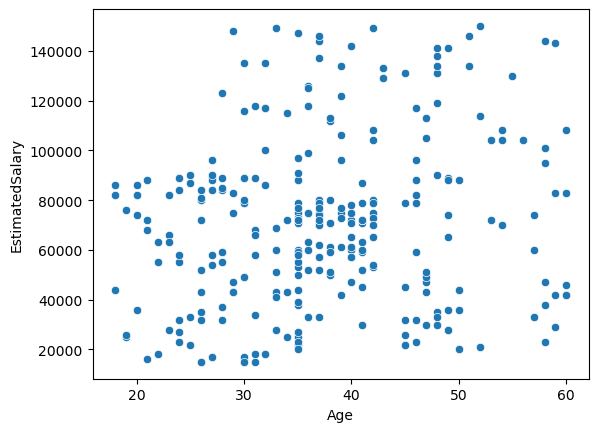

In [138]:
sns.scatterplot(x=X_train['Age'], y=X_train['EstimatedSalary'])

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

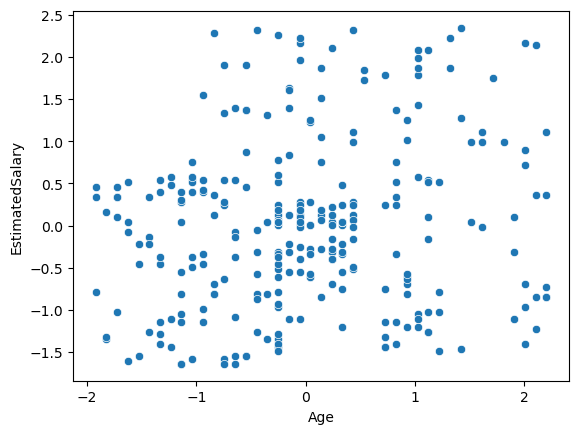

In [140]:
sns.scatterplot(x=x_train_scaled['Age'], y=x_train_scaled['EstimatedSalary'])

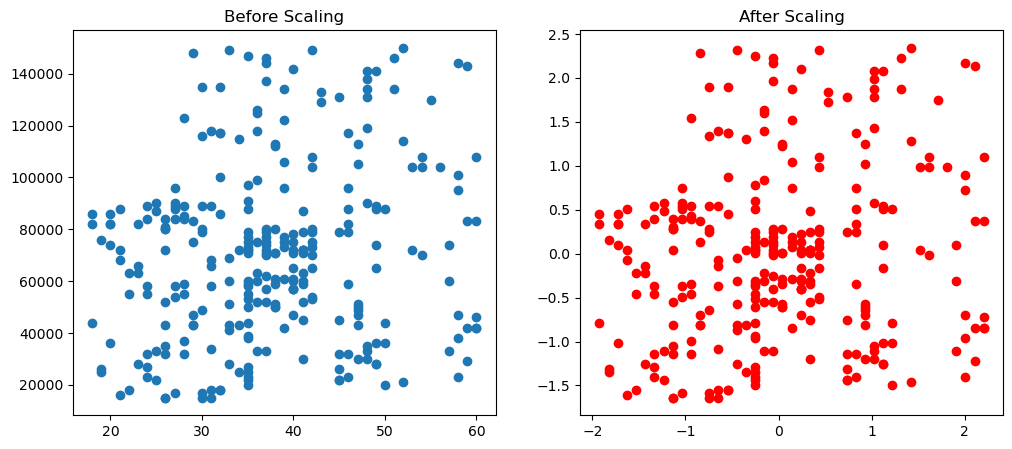

In [148]:
#using matplotlib

fig, (ax1, ax2) = plt.subplots(ncols=2 , figsize = (12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary']) 
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'], color='red') 
ax2.set_title('After Scaling')
plt.show()

In [ ]:
# As we can see there is no effect of scaling on the data but it has now got scaled to a dimension where 
# its Std is 1 and Mean is 0

# Now lets see how scalling affects Model training

<h1> Model Training and Finding Accuracy

In [151]:
from sklearn.metrics import accuracy_score

In [153]:
from sklearn.linear_model import LogisticRegression

In [157]:
reg= LogisticRegression()
reg_scaled = LogisticRegression()

In [159]:
reg.fit(X_train, y_train)                                 #training on un-scaled data
reg_scaled.fit(x_train_scaled, y_train)                   #training on scaled data

LogisticRegression()

In [163]:
y_pred = reg.predict(X_test)
y_pred_scaled = reg_scaled.predict(x_test_scaled)

In [175]:
print("Accuracy Score for Un-scaled Data  : ", (accuracy_score(y_test,y_pred)*100))
print("Accuracy Score for Scaled Data  : ", (accuracy_score(y_test,y_pred_scaled)*100))

Accuracy Score for Un-scaled Data  :  85.0
Accuracy Score for Scaled Data  :  85.0


In [177]:
# The Accuracy came the same, this might be because we had given random state as 42, but mostly the model accuracy comes quite better
# than the un-scaled data